# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 623


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}{city}&APPID={weather_api_key}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | narsaq
Processing Record 2 of Set 1 | cape town
Processing Record 3 of Set 1 | ribeira grande
Processing Record 4 of Set 1 | kapaa
Processing Record 5 of Set 1 | saskylakh
Processing Record 6 of Set 1 | khani
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | coaldale
Processing Record 9 of Set 1 | faya
Processing Record 10 of Set 1 | marsh harbour
Processing Record 11 of Set 1 | cabo san lucas
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | antofagasta
Processing Record 14 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 15 of Set 1 | longyearbyen
Processing Record 16 of Set 1 | arraial do cabo
Processing Record 17 of Set 1 | road town
Processing Record 18 of Set 1 | manzhouli
Processing Record 19 of Set 1 | tuktoyaktuk
Processing Record 20 of Set 1 | flinders
Processing Record 21 of Set 1 | saint george
Pro

Processing Record 37 of Set 4 | tiksi
Processing Record 38 of Set 4 | jabinyanah
Processing Record 39 of Set 4 | tuatapere
Processing Record 40 of Set 4 | loa janan
Processing Record 41 of Set 4 | yellowknife
Processing Record 42 of Set 4 | mar del plata
Processing Record 43 of Set 4 | northam
Processing Record 44 of Set 4 | yashalta
Processing Record 45 of Set 4 | kosa
Processing Record 46 of Set 4 | khvoynaya
Processing Record 47 of Set 4 | sabang
Processing Record 48 of Set 4 | salamanca
Processing Record 49 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 0 of Set 5 | longhua
Processing Record 1 of Set 5 | los llanos de aridane
Processing Record 2 of Set 5 | varhaug
Processing Record 3 of Set 5 | puerto ayora
Processing Record 4 of Set 5 | kamenka
Processing Record 5 of Set 5 | bantou
Processing Record 6 of Set 5 | susehri
Processing Record 7 of Set 5 | aflu
City not found. Skipping...
Processing Record 8 of Set 5 | ust-ishim
Processing Record 9 of Set 5 | namt

Processing Record 26 of Set 8 | kabalo
Processing Record 27 of Set 8 | college
Processing Record 28 of Set 8 | carrollton
Processing Record 29 of Set 8 | makinsk
Processing Record 30 of Set 8 | santana do paraiso
Processing Record 31 of Set 8 | quelimane
Processing Record 32 of Set 8 | ibipora
Processing Record 33 of Set 8 | shingu
Processing Record 34 of Set 8 | marcona
City not found. Skipping...
Processing Record 35 of Set 8 | scarborough
Processing Record 36 of Set 8 | kaseda
Processing Record 37 of Set 8 | tautira
Processing Record 38 of Set 8 | sayansk
Processing Record 39 of Set 8 | fortuna
Processing Record 40 of Set 8 | kiunga
Processing Record 41 of Set 8 | saint anthony
Processing Record 42 of Set 8 | grindavik
Processing Record 43 of Set 8 | mehamn
Processing Record 44 of Set 8 | normandin
Processing Record 45 of Set 8 | klaksvik
Processing Record 46 of Set 8 | vila velha
Processing Record 47 of Set 8 | clyde river
Processing Record 48 of Set 8 | mitu
Processing Record 49 o

Processing Record 15 of Set 12 | salmas
Processing Record 16 of Set 12 | dryden
Processing Record 17 of Set 12 | korla
Processing Record 18 of Set 12 | sisimiut
Processing Record 19 of Set 12 | moindou
Processing Record 20 of Set 12 | auki
Processing Record 21 of Set 12 | nkhata bay
Processing Record 22 of Set 12 | leningradskiy
Processing Record 23 of Set 12 | lavrentiya
Processing Record 24 of Set 12 | alappuzha
Processing Record 25 of Set 12 | parrita
Processing Record 26 of Set 12 | dunedin
Processing Record 27 of Set 12 | tahta
Processing Record 28 of Set 12 | mayo
Processing Record 29 of Set 12 | ola
Processing Record 30 of Set 12 | saint helens
Processing Record 31 of Set 12 | shumskiy
Processing Record 32 of Set 12 | caronport
Processing Record 33 of Set 12 | reporoa
Processing Record 34 of Set 12 | pacifica
Processing Record 35 of Set 12 | gamba
Processing Record 36 of Set 12 | ostersund
Processing Record 37 of Set 12 | qeshm
Processing Record 38 of Set 12 | ust-nera
Processin

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,narsaq,60.9167,-46.0500,6.12,98,100,1.81,GL,1677213501
1,cape town,-33.9258,18.4232,20.77,81,0,5.66,ZA,1677213502
2,ribeira grande,38.5167,-28.7000,13.21,91,100,0.89,PT,1677213502
3,kapaa,22.0752,-159.3190,24.99,83,100,7.20,US,1677213503
4,saskylakh,71.9167,114.0833,-23.05,98,100,2.08,RU,1677213504


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,narsaq,60.9167,-46.0500,6.12,98,100,1.81,GL,1677213501
1,cape town,-33.9258,18.4232,20.77,81,0,5.66,ZA,1677213502
2,ribeira grande,38.5167,-28.7000,13.21,91,100,0.89,PT,1677213502
3,kapaa,22.0752,-159.3190,24.99,83,100,7.20,US,1677213503
4,saskylakh,71.9167,114.0833,-23.05,98,100,2.08,RU,1677213504


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

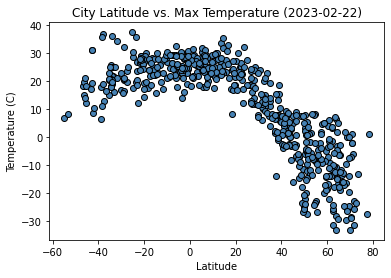

In [8]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df['Lat']
temperature = city_data_df['Max Temp']
plt.scatter(latitude, temperature, marker="o", facecolors="steelblue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2023-02-22)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

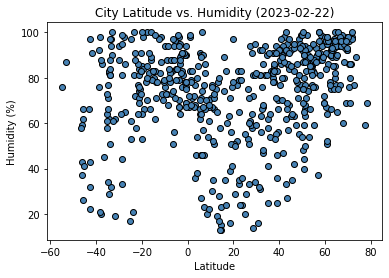

In [9]:
# Build the scatter plots for latitude vs. humidity
latitude = city_data_df['Lat']
humidity = city_data_df['Humidity']
plt.scatter(latitude, humidity, marker="o",facecolors="steelblue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-02-22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

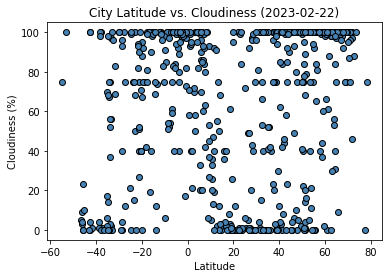

In [10]:
# Build the scatter plots for latitude vs. cloudiness
latitude = city_data_df['Lat']
cloudiness = city_data_df['Cloudiness']
plt.scatter(latitude, cloudiness, marker="o",facecolors="steelblue", edgecolors="black")


# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-02-22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

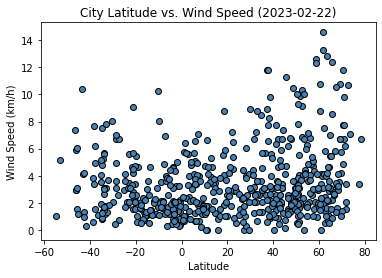

In [11]:
# Build the scatter plots for latitude vs. wind speed
latitude = city_data_df['Lat']
wind_speed = city_data_df['Wind Speed']
plt.scatter(latitude, wind_speed, marker="o", facecolors="steelblue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-02-22)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (km/h)")

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def lin_gres_plot(x_values,y_values,y_label,coord):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,coord,fontsize=12,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    print(f"The r-value is: {rvalue}")
    if coord[0]>0:
        print(f'In the northern hemisphere sample data, {round((rvalue**2)*100,1)}% of the {y_label} datapoints can be explained by the degrees of Latitude.')
    else:
        print(f'In the southern hemisphere sample data, {round((rvalue**2)*100,1)}% of the {y_label} datapoints can be explained by the degrees of Latitude.')

    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,narsaq,60.9167,-46.0500,6.12,98,100,1.81,GL,1677213501
2,ribeira grande,38.5167,-28.7000,13.21,91,100,0.89,PT,1677213502
3,kapaa,22.0752,-159.3190,24.99,83,100,7.20,US,1677213503
4,saskylakh,71.9167,114.0833,-23.05,98,100,2.08,RU,1677213504
5,khani,41.9563,42.9566,-3.24,98,100,0.86,GE,1677213504


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,cape town,-33.9258,18.4232,20.77,81,0,5.66,ZA,1677213502
11,antofagasta,-23.6500,-70.4000,19.60,81,15,1.82,CL,1677213484
13,arraial do cabo,-22.9661,-42.0278,23.73,91,100,5.63,BR,1677213509
17,flinders,-34.5833,150.8552,25.59,62,67,4.80,AU,1677213512
19,ushuaia,-54.8000,-68.3000,6.81,76,75,1.03,AR,1677213513


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.866492776695691
In the southern hemisphere sample data, 75.1% of the Max Temp (C) datapoints can be explained by the degrees of Latitude.


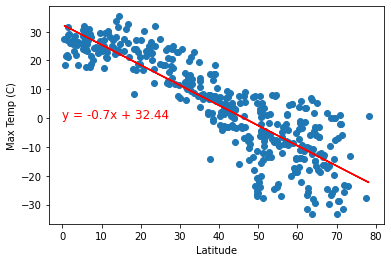

In [15]:
# Linear regression on Northern Hemisphere
lin_gres_plot(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'],'Max Temp (C)',(0,0))


The r-value is: 0.4255021217966768
In the southern hemisphere sample data, 18.1% of the Max Temp (C) datapoints can be explained by the degrees of Latitude.


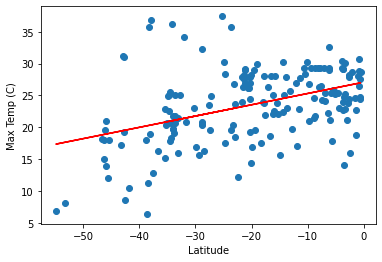

In [16]:
# Linear regression on Southern Hemisphere
lin_gres_plot(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'],'Max Temp (C)',(0,0))


**Discussion about the linear relationship:** the linear relationship between degrees Latitude and Max Temp shows that Temp increase when Latitude tend to go to Zero (0 degrees latitude)

northern hemisphere has a high negative correlation (r = -0.866492776695691)
southern hemisphere has a weak correlation (r = 0.4255021217966768)

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.45745237000483185
In the southern hemisphere sample data, 20.9% of the Humidity (%) datapoints can be explained by the degrees of Latitude.


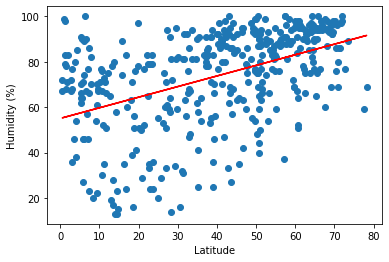

In [17]:
# Northern Hemisphere
lin_gres_plot(northern_hemi_df['Lat'],northern_hemi_df['Humidity'],'Humidity (%)',(0,0))

The r-value is: 0.3732002204023911
In the southern hemisphere sample data, 13.9% of the Humidity (%) datapoints can be explained by the degrees of Latitude.


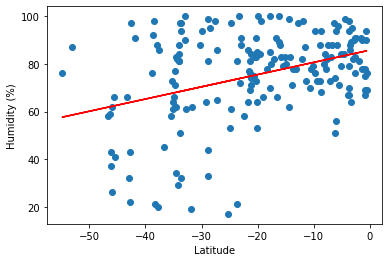

In [18]:
# Southern Hemisphere
lin_gres_plot(southern_hemi_df['Lat'],southern_hemi_df['Humidity'],'Humidity (%)',(0,0))

**Discussion about the linear relationship:** northern and southern hemisphere regressions suggest a correlation between latitude and humidity. stronger correlation (r = 0.45), but with an r-squared value of (13.9%-20.9%%) this correlation is also not very reliable.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2976034400919736
In the southern hemisphere sample data, 8.9% of the Cloudiness (%) datapoints can be explained by the degrees of Latitude.


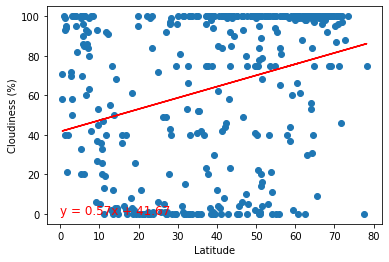

In [19]:
# Northern Hemisphere
lin_gres_plot(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'],'Cloudiness (%)',(0,0))


The r-value is: 0.5275811740921036
In the southern hemisphere sample data, 27.8% of the Cloudiness (%) datapoints can be explained by the degrees of Latitude.


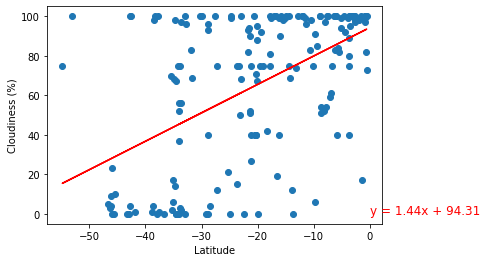

In [20]:
# Southern Hemisphere
lin_gres_plot(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'],'Cloudiness (%)',(0,0))


**Discussion about the linear relationship:** Northern Hemisphere r-value is: 0.2976034400919736.

Southern Hemisphere r-value is: 0.5275811740921036


### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.2130686177486661
In the southern hemisphere sample data, 4.5% of the Wind Speed (kph) datapoints can be explained by the degrees of Latitude.


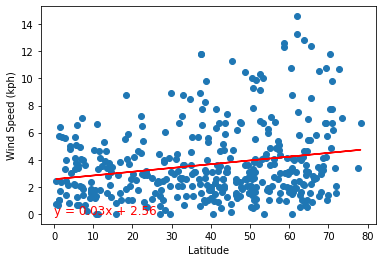

In [21]:
# Northern Hemisphere
lin_gres_plot(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'],'Wind Speed (kph)',(0,0))


The r-value is: -0.25343472785698135
In the southern hemisphere sample data, 6.4% of the Wind Speed (kph) datapoints can be explained by the degrees of Latitude.


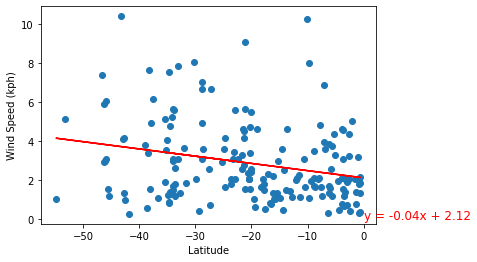

In [22]:
# Southern Hemisphere
lin_gres_plot(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'],'Wind Speed (kph)',(0,0))


**Discussion about the linear relationship:** Northern Hemisphere has a weak correlation r-value is: 0.2130686177486661

Southern Hemisphere has a negative Medium r-value = -0.25343472785698135